In [1]:
import pandas             as pd
import numpy              as np
import pylab              as pl

from   itertools          import combinations
from   scipy.spatial      import Delaunay
from   scipy.spatial      import KDTree
from   astropy.table      import Table

from src.misc import plot_3D
from src.misc import plot_3D_unique
from src.misc import plot_3D_unique_neighbors
from src.misc import topological_features
from src.misc import Beta_sk

In [2]:
params = {'legend.fontsize': '20',
          'figure.figsize': (8, 8),
         'axes.labelsize': '20',
         'axes.titlesize':'20',
         'xtick.labelsize':'20',
         'ytick.labelsize':'20',
         'axes.labelpad' : '20'}
pl.rcParams.update(params)

## GAMA

In [36]:
data = Table.read('../../data/gama_gold_ddp.fits')
N_real = len(data)

rot_xyz_labels = ['ROTCARTESIAN_X','ROTCARTESIAN_Y','ROTCARTESIAN_Z']
points = data[rot_xyz_labels].to_pandas()
points = np.array(points)

In [37]:
G15 = np.array(data['FIELD'], dtype=str)
ii_G15 = G15 == 'G15'

DDP = np.array(data['DDP'])
ii_DDP1 = DDP[:,0] == 1 

points = points[ii_DDP1 & ii_G15]

# points = points[ii_DDP1]

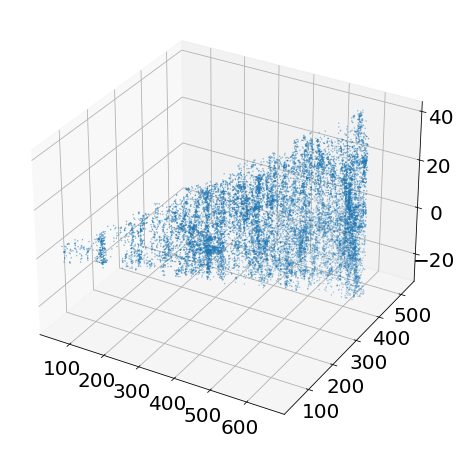

In [38]:
fig = pl.figure(figsize=(8,8))
ax = pl.axes(projection='3d')
ax.scatter3D(points[:,0],points[:,1],points[:,2], s=0.1)

## Bsk

In [42]:
# unique_pairs_bsk = Beta_sk(points, 1.0, 300)

 Default cosmology: omegam, w =   0.26000000000000001       -1.0000000000000000     
 Using   cosmology: omegam, w =   0.26000000000000001       0.26000000000000001     
 #####################################
  Settings
   omegam, w =    0.260   0.260
   inputfilename: ./data/pos.tmp
   outputfilename: ../data/posbsk.tmp
   beta =    1.0000000000000000     
   printinfo =  F
   #-NNB searching for BSK:          300
   minimalrcut:   -1.0000000150474662E+030
   maximalrcut:    1.0000000150474662E+030
 #####################################
   (BSK) Begins.
   (BSK) Calculating BSK...
  *** Result wrote to: xdl_beta_skeleton/../data/posbsk.tmp.BSKIndex
 0%==> ERROR! overflow: i1, i2, imin, imax, 2*di+1 =            0           4           1           3           5


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG IEEE_DIVIDE_BY_ZERO


In [40]:
# %%time
# ids, n_bsk_connections, id_bsk_connections, dis_bsk_connections, avdis_bsk_connections, id_bsk_firstneigh_connections, n_bsk_firstneigh_connections = topological_features(points, unique_pairs_bsk)

ValueError: need at least one array to concatenate

In [41]:
# fig = pl.figure(figsize=(8,8))
# ax  = pl.axes(projection='3d')
# ax  = plot_3D(ax, points, id_bsk_connections)

In [ ]:
# fig = pl.figure(figsize=(8,8))
# ax  = pl.axes(projection='3d')
# ax  = plot_3D_unique(ax, points, id_bsk_connections, 0)

In [ ]:
# fig = pl.figure(figsize=(8,8))
# ax  = pl.axes(projection='3d')
# ax  = plot_3D_unique_neighbors(ax,points, id_bsk_connections, id_bsk_firstneigh_connections, 0)

In [ ]:
# fig = pl.figure(figsize=(8,8))
# pl.subplot(2,2,1)
# _ = pl.hist(n_bsk_connections)
# pl.xlabel('N. of Connections')
# pl.subplot(2,2,2)
# _ = pl.hist(avdis_bsk_connections)
# pl.xlabel('Av. Connections Length')
# pl.subplot(2,2,3)
# _ = pl.hist(n_bsk_firstneigh_connections)
# pl.xlabel('N. of First Connections')
# pl.tight_layout()
# fig.tight_layout()
# pl.show()

## Delaunay

In [ ]:
delaunay = Delaunay(points)

In [ ]:
all_pairs = []
for simplex in delaunay.simplices:
    a = list(combinations(simplex,2))
    l = list(map(list, a))
    l = list(map(np.sort, l))
    l = list(map(list, l))
    all_pairs.append(l)
all_pairs = np.vstack(all_pairs)
unique_pairs_delaunay = np.unique(all_pairs, axis=0)

In [ ]:
%%time
ids, n_delaunay_connections, id_delaunay_connections, dis_delaunay_connections, avdis_delaunay_connections, id_delaunay_firstneigh_connections, n_delaunay_firstneigh_connections = topological_features(points, unique_pairs_delaunay)

In [ ]:
# fig = pl.figure(figsize=(8,8))
# ax  = pl.axes(projection='3d')
# ax  = plot_3D(ax,points, id_delaunay_connections)

In [ ]:
fig = pl.figure(figsize=(8,8))
ax  = pl.axes(projection='3d')
ax  = plot_3D_unique(ax, points, id_delaunay_connections, 0)

In [ ]:
fig = pl.figure(figsize=(8,8))
ax  = pl.axes(projection='3d')
ax  = plot_3D_unique_neighbors(ax,points, id_delaunay_connections, id_delaunay_firstneigh_connections, 0)

In [ ]:
fig = pl.figure(figsize=(8,8))
pl.subplot(2,2,1)
_ = pl.hist(n_delaunay_connections)
pl.xlabel('N. of Connections')
pl.subplot(2,2,2)
_ = pl.hist(avdis_delaunay_connections)
pl.xlabel('Av. Connections Length')
pl.subplot(2,2,3)
_ = pl.hist(n_delaunay_firstneigh_connections)
pl.xlabel('N. of First Connections')
pl.tight_layout()
fig.tight_layout()
pl.show()

In [ ]:
df = pd.DataFrame()
df['ID'] = ids
df['ID_DELAUNAY_CONNECTIONS']     =  id_delaunay_connections
df['N_DELAUNAY_CONNECTIONS']      =  n_delaunay_connections
df['DIS_DELAUNAY_CONNECTIONS']    =  dis_delaunay_connections
df['AVDIS_DELAUNAY_CONNECTIONS']  =  avdis_delaunay_connections
df['ID_DELAUNAY_FIRSTNEIGH_CONNECTIONS']     =  id_delaunay_firstneigh_connections
df['N_DELAUNAY_FIRSTNEIGH_CONNECTIONS']      =  n_delaunay_firstneigh_connections
df['N_BSK_CONNECTIONS']      =  n_bsk_connections
df['DIS_BSK_CONNECTIONS']    =  dis_bsk_connections
df['AVDIS_BSK_CONNECTIONS']  =  avdis_bsk_connections
df['ID_BSK_FIRSTNEIGH_CONNECTIONS']     =  id_bsk_firstneigh_connections
df['N_BSK_FIRSTNEIGH_CONNECTIONS']      =  n_bsk_firstneigh_connections
df

In [ ]:
df.to_pickle('./data/random_topological_dataset.pkl')